# Data-analytiikan osaaja

## Koulutus: 13.2.2020-14.2.2020

# Aihe: Datan visualisointi

Lataa seuraava tiedosto: THL_MyData2016_hackathon_dataset.xls Datasta kerrotaan enemmän THL:n kotisivuilla osoitteessa: https://thl.fi/en/web/thlfi-en/statistics/statistical-databases/open-data/thl-and-hackathons 
    
Valitse ne sarakkeet joissa on numeerisia arvoja. Voit valita Pandas DataFrame muuttujasta my_frame sarakkeet 'a' ja 'b' seuraavalla komennolla:

another_dataframe = my_frame[['a','b']]

In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [2]:
health_data = pd.read_excel("THL_MyData2016_hackathon_dataset.xls")

In [3]:
type(health_data)

pandas.core.frame.DataFrame

In [4]:
health_data.columns

Index(['ikalk', 'sp', 'bmi', 'systbp2', 'diastbp2', 'kol', 'kol_hdl',
       'Fx_plus', 'Fx'],
      dtype='object')

In [5]:
numeric_health_data = health_data[['bmi','systbp2', 'diastbp2','kol','kol_hdl']]

In [6]:
type(numeric_health_data)

pandas.core.frame.DataFrame

In [7]:
numeric_health_data.describe()

,bmi,systbp2,diastbp2,kol,kol_hdl
count,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000
mean,27.109074,132.042912,78.334268,5.270606,1.482348
std,4.506711,17.805731,10.534951,0.995119,0.362748
min,16.530000,88.000000,45.770000,2.550000,0.700000
25%,23.940000,120.000000,72.000000,4.567500,1.220000
50%,26.540000,130.000000,78.000000,5.235000,1.440000
75%,29.707500,142.000000,86.000000,5.912500,1.710000
max,45.180000,200.630000,109.370000,8.830000,2.850000


In [8]:
numeric_health_data

,bmi,systbp2,diastbp2,kol,kol_hdl
0,16.53,104.40,58.00,3.42,0.77
1,17.43,105.57,60.00,3.48,0.85
2,19.33,106.00,63.80,3.52,0.88
3,20.74,107.90,66.00,3.57,0.89
4,20.88,108.00,68.00,3.63,0.92
...,...,...,...,...,...
1183,34.89,179.00,90.00,7.38,2.19
1184,35.87,183.12,90.89,7.53,2.21
1185,38.05,190.00,92.61,7.86,2.22
1186,38.92,190.00,93.56,7.95,2.30


## Visualisointia

Nyt harjoittelemme datan visualointia. Käytä seuraavia lähteitä visualisoinnin opiskeluun:

Matplotlib -visualisointikirjasto
https://matplotlib.org

Matplotlib esimerkkejä:
https://matplotlib.org/gallery/index.html ja 
https://github.com/matplotlib/AnatomyOfMatplotlib

Jake VanderPlas: Python Data Science Handbook:
https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html

Pythonin visualisointityökaluista:
https://pyviz.org

Seaborn-kirjasto visualisointiin:
https://seaborn.pydata.org

Voi esimerkkinä käyttää MyBad terveysdataa tai jotakin muuta dataa.

Tee ainakin seuraavat kuvaajat:
    1. x-y plot
    2. histogrammi (esim. kolesteroliarvojen jakauma)
    3. piirakkakuvaaja (pie chart) osuuksien kuvaamiseen

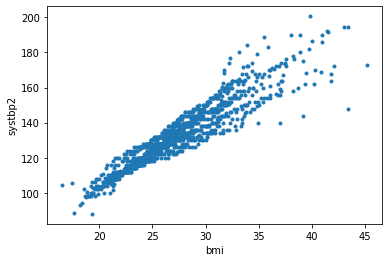

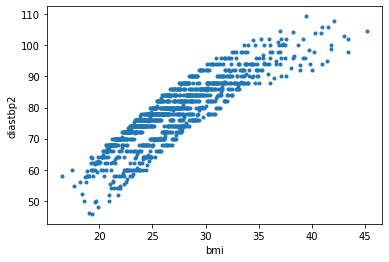

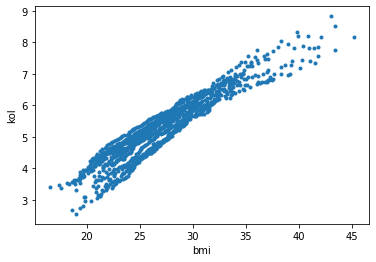

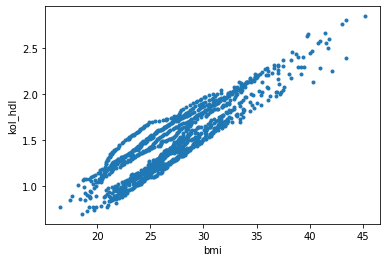

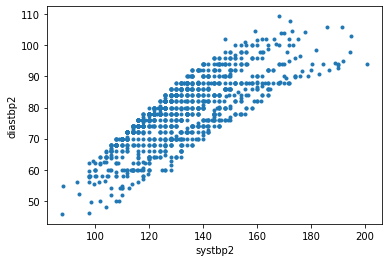

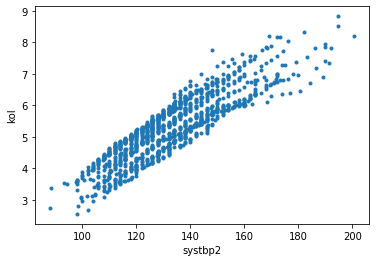

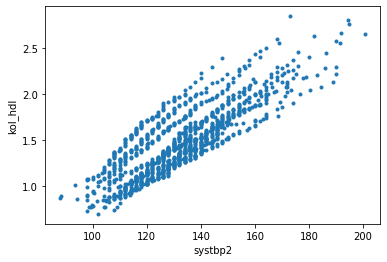

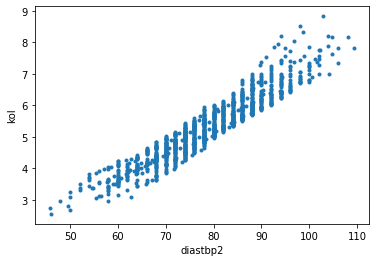

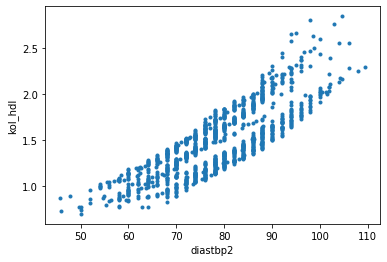

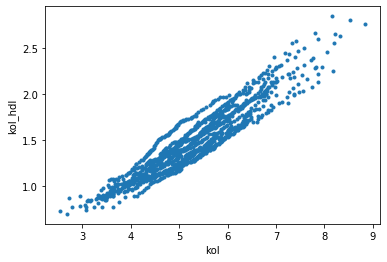

In [9]:
from itertools import combinations

for pair in combinations(numeric_health_data.columns, 2):
    fig, ax = plt.subplots()
    plt.plot(numeric_health_data[pair[0]], numeric_health_data[pair[1]], '.')
    plt.xlabel(str(pair[0]))
    plt.ylabel(str(pair[1]))

In [10]:
titanic = pd.read_csv('titanic.csv')

In [11]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [12]:
Pclass = titanic['Pclass'].value_counts().sort_index()
Pclass

1    216
2    184
3    487
Name: Pclass, dtype: int64

In [13]:
plt.style.use('seaborn-pastel')

([<matplotlib.patches.Wedge at 0x1a25ab5080>,
 [Text(0.8079228723374904, 0.7756678621381314, 'Ensimmäinen luokka'),
  Text(-0.6424958508884722, 0.9173870947376022, 'Toinen luokka'),
  Text(-0.17187563327476224, -1.1067333765123375, 'Kolmas luokka')],
 [Text(0.4472430186153965, 0.42938756654075133, '24.4%'),
  Text(-0.35566734602754707, 0.5078392845868869, '20.7%'),
  Text(-0.09514543984852909, -0.6126559762836155, '54.9%')])

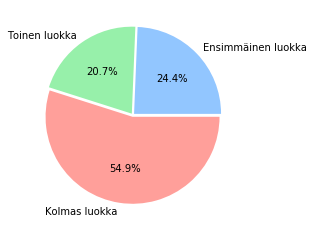

In [14]:
plt.pie(Pclass,
        labels = ['Ensimmäinen luokka', 'Toinen luokka', 'Kolmas luokka'],
        explode = (0.02,0.02,0.02),
        autopct = '%1.1f%%')

In [21]:
family_members = (titanic['Siblings/Spouses Aboard'] + titanic['Parents/Children Aboard']).value_counts().sort_index()
family_members

0     533
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
dtype: int64

In [22]:
family_members.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 10], dtype='int64')

Text(0.5, 1.0, 'Perheenjäseniä')

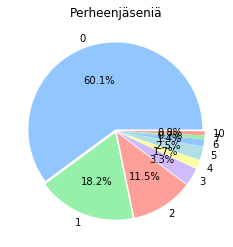

In [24]:
plt.pie(family_members,
        labels = family_members.index,
        explode = (0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02),
        autopct = '%1.1f%%'
        )
plt.title('Perheenjäseniä')

Text(0, 0.5, 'Määrä')

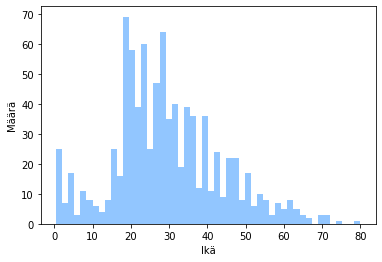

In [18]:
plt.hist(titanic['Age'], bins=50)
plt.xlabel('Ikä')
plt.ylabel('Määrä')

Text(0, 0.5, 'Määrä')

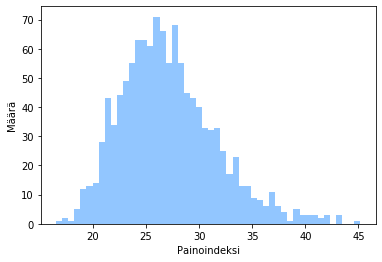

In [19]:
plt.hist(numeric_health_data['bmi'], bins=50)
plt.xlabel('Painoindeksi')
plt.ylabel('Määrä')